In [1]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt

all_birds = pd.read_csv('F:\\Python_projects\\state_of_birds_india\\birds_vis\\all_birds.csv')
ind_adm1 = gpd.read_file('F:\\Python_projects\\state_of_birds_india\\birds_vis\\IND_adm1.gpkg')
india = ind_adm1.to_crs(epsg='24378')

In [103]:
print(set(all_birds['IUCN Category']))
print(set(all_birds['SoIB 2023 Priority Status']))

{'Vulnerable', 'Endangered', 'Least Concern', 'Critically Endangered', 'Near Threatened', 'Not Recognised'}
{'Low', 'Moderate', 'High'}


#### Visualize Table 5: Correspondence between IUCN Red List Categories and SoIB Categories of Conservation Priority


#### Examine IUCN categories and SOIB 2023 Priority Status

In [104]:
tab5 = all_birds.groupby(['IUCN Category', 'SoIB 2023 Priority Status']).count().reset_index()
#define function for the custom sort
iucn_order = ['Critically Endangered', 'Endangered', 'Vulnerable', 'Near Threatened', 'Least Concern', 'Not Recognised']
soib_order = ['High', 'Moderate', 'Low']

tab5['IUCN Category'] = pd.Categorical(tab5['IUCN Category'], categories=iucn_order, ordered=True)
tab5['SoIB 2023 Priority Status'] = pd.Categorical(tab5['SoIB 2023 Priority Status'], categories=soib_order, ordered=True)

# Sort the DataFrame based on col1 and col2
result_sorted = tab5.sort_values(by=['IUCN Category', 'SoIB 2023 Priority Status']).reset_index(drop=True)
print(result_sorted.head(3))


,IUCN Category,SoIB 2023 Priority Status,Unnamed: 0,English Name,Scientific Name,Order,Family,Endemicity,Habitat Specialization,CITES Appendix,source
0,Critically Endangered,High,115,115,115,115,115,115,115,91,115
1,Endangered,High,122,122,122,122,122,122,122,49,122
2,Endangered,Low,26,26,26,26,26,26,26,26,26


#### Visualize IUCN and SOIB priorities

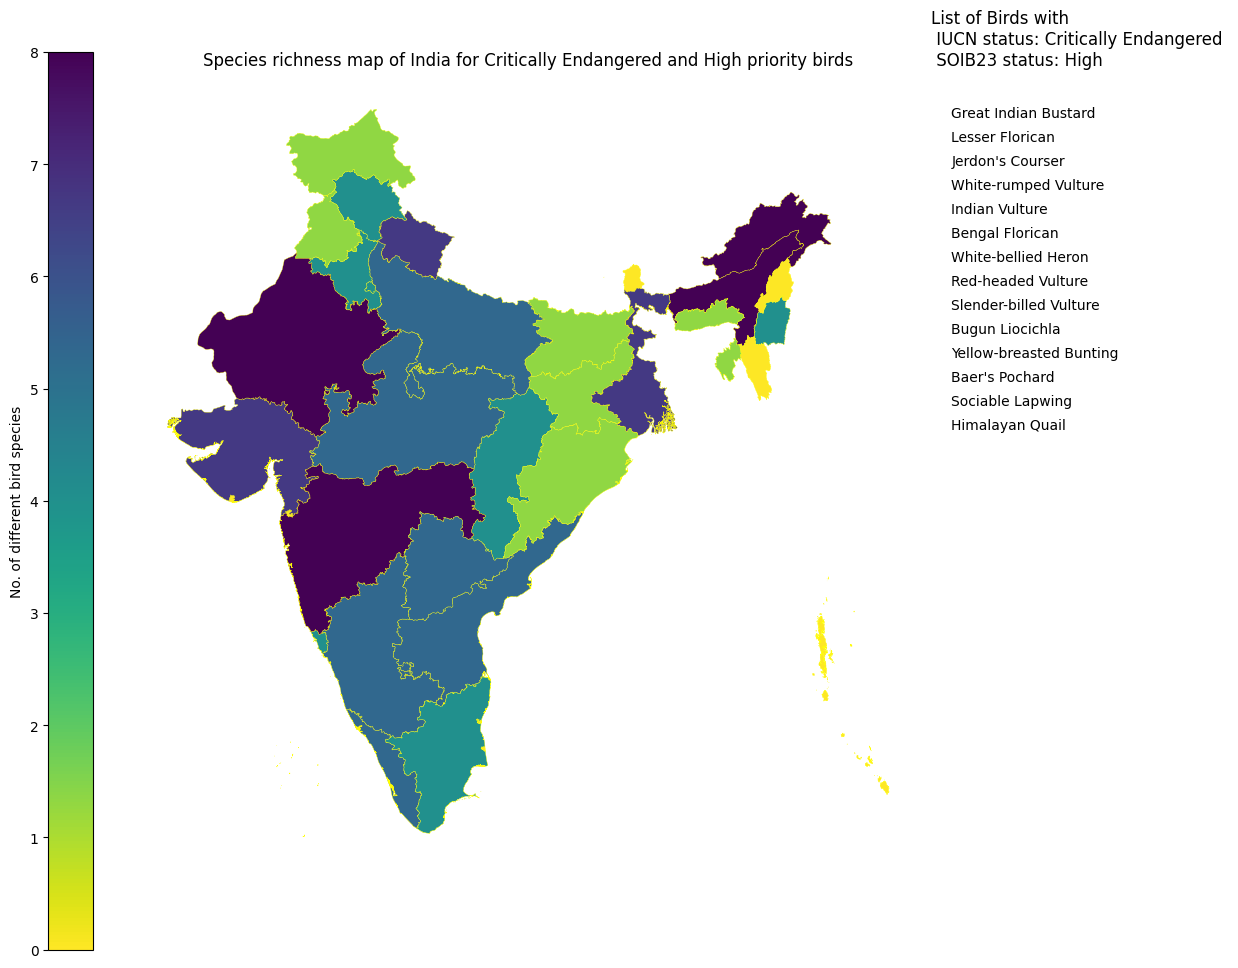

In [111]:
# Define a function to create relevant maps and display a list of species as per our criteria

def stat_tab(df, iucn, soib):
        # Filter by criteria
        iucn_soib = df[(df['IUCN Category'] == iucn) & (df['SoIB 2023 Priority Status'] == soib)]
        
        # list of species
        iucn_soib_species = iucn_soib.loc[:, ~iucn_soib.columns.isin(['source', 'Unnamed: 0'])]
        iucn_soib_species = iucn_soib_species.drop_duplicates()
        #print('List of ', iucn, ' and ', soib, ' priority bird species = ', '\n', iucn_soib_species['English Name'])
        
        #no of species classified as Critically Endangered and High status
        #print( 'no of species classified as ', iucn, ' and ', soib, ' status = ' , len(iucn_soib_species))
        
        state_wise = iucn_soib.groupby('source').count().reset_index()[['source', 'Unnamed: 0']]
        result = pd.merge(india, state_wise, how='left', left_on='NAME_1', right_on='source')
        result['Unnamed: 0'].fillna(0, inplace=True)
        result['Unnamed: 0'] = round(result['Unnamed: 0'], 0)
        
        # Plot with color bar
        fig, axes = plt.subplots(1, 2, figsize=(20, 10))
        
        # Use a single color bar for the entire plot
        cax = plt.cm.ScalarMappable(cmap='viridis_r')
        cax.set_array([result['Unnamed: 0']])
        
        ax=axes[0]
        n=len(set(result['Unnamed: 0']))-2        
        result.plot(column='Unnamed: 0', scheme='quantiles', k=n, cmap='viridis_r', edgecolor='yellow', linewidth=0.25, 
                ax=ax, cax=cax)
        
        ax.set_title(f'Species richness map of India for {iucn} and {soib} priority birds')
        ax.set_axis_off()
        ax.autoscale()
        
        # Set the color bar label
        cax.set_clim(result['Unnamed: 0'].min(), result['Unnamed: 0'].max())
        cbar = fig.colorbar(cax, ax=ax, format = '%0.0f',pad=0.01, location = 'left')
        cbar.set_label('No. of different bird species')
        
        ax2=axes[1]
        text_list = iucn_soib_species['English Name']
        
        # Display the list vertically
        for i, text in enumerate(text_list):
            ax2.text(0.1, 0.95 - 0.03 * i, text, ha='left', va='center', transform=ax2.transAxes)
        ax2.set_title(f'List of Birds with \n IUCN status: {iucn} \n SOIB23 status: {soib}', loc='left')
        ax2.set_axis_off()
        ax2.autoscale()
        
        # Adjust the layout to prevent overlap
        plt.tight_layout()
        
        #Adjust position of both plots
        axes[0].set_position([0.1, 0.1, 1, 0.8]) 
        axes[1].set_position([0.5, 0.1, 0.1, 0.8])
        
        plt.show()

stat_tab(all_birds, iucn = 'Critically Endangered', soib = 'High')